<a href="https://colab.research.google.com/github/RobertGrados/QuantumGravity/blob/master/Ambiguityf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

TypeError: Image data of dtype complex128 cannot be converted to float

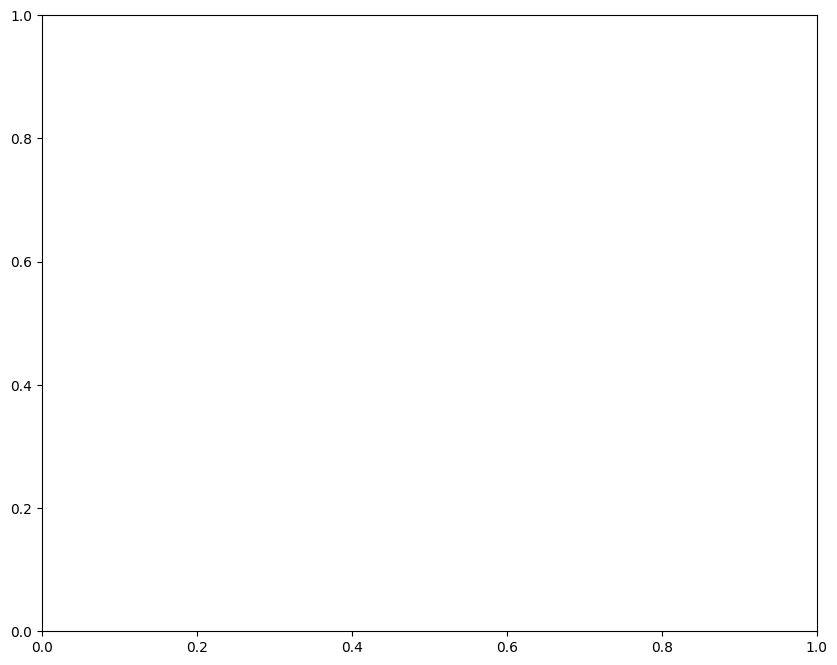

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def ambiguity_function(x, t, tau_max, nu_max, n_tau, n_nu):
    """
    Compute the ambiguity function for a given signal x(t).

    Parameters:
    x : array_like
        Input signal
    t : array_like
        Time array corresponding to x
    tau_max : float
        Maximum time delay to compute
    nu_max : float
        Maximum Doppler frequency to compute
    n_tau : int
        Number of time delay points
    n_nu : int
        Number of Doppler frequency points

    Returns:
    AF : 2D numpy array
        Ambiguity function
    tau : array_like
        Time delay array
    nu : array_like
        Doppler frequency array
    """
    N = len(x)
    tau = np.linspace(-tau_max, tau_max, n_tau)
    nu = np.linspace(-nu_max, nu_max, n_nu)

    AF = np.zeros((n_tau, n_nu), dtype=complex)

    for i, td in enumerate(tau):
        for j, f in enumerate(nu):
            # Time-shifted and Doppler-shifted signal
            x_shifted = np.interp(t - td, t, x) * np.exp(1j * 2 * np.pi * f * t)
            # Compute ambiguity function
            AF[i, j] = np.abs(np.sum(x * np.conj(x_shifted))) ** 2

    # Normalize
    AF /= np.max(AF)

    return AF, tau, nu

# Example usage
def example_signal(t):
    """Example input signal: Gaussian pulse"""
    return np.exp(-t**2)

# Generate time array
t = np.linspace(-10, 10, 1000)

# Generate input signal
x = example_signal(t)

# Compute ambiguity function
AF, tau, nu = ambiguity_function(x, t, tau_max=5, nu_max=1, n_tau=100, n_nu=100)

# Plot the ambiguity function
plt.figure(figsize=(10, 8))
plt.imshow(AF, extent=[-5, 5, -1, 1], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Normalized Magnitude')
plt.xlabel('Time Delay (τ)')
plt.ylabel('Doppler Frequency (ν)')
plt.title('Ambiguity Function')
plt.show()

# Plot the input signal
plt.figure(figsize=(10, 4))
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.show()

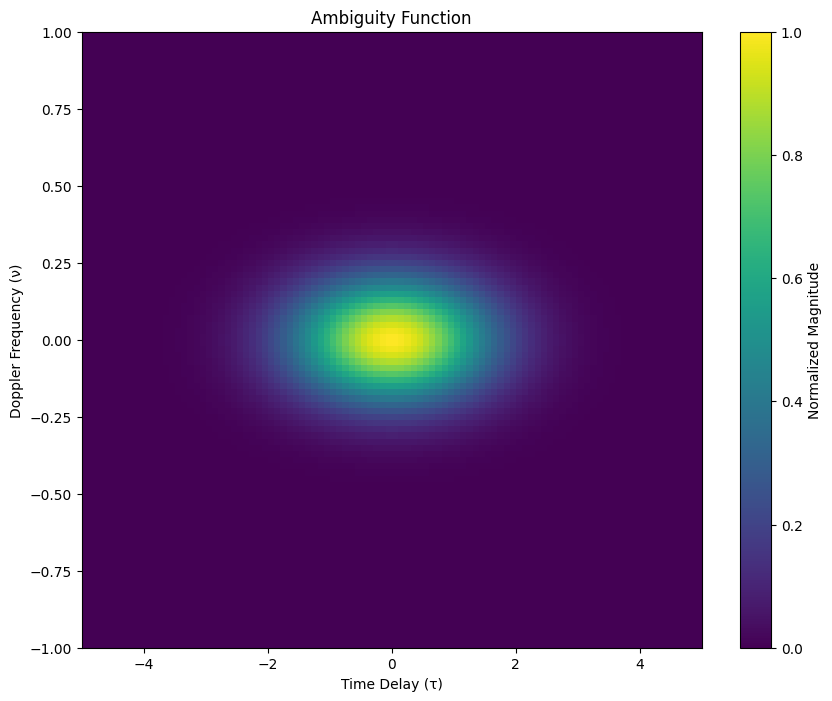

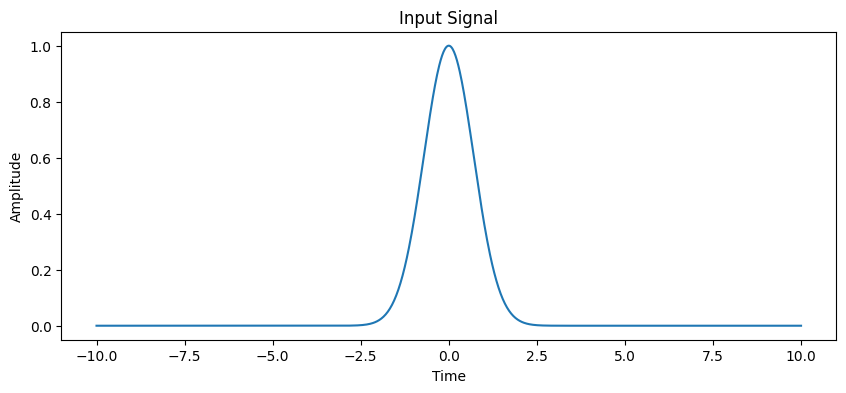

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def ambiguity_function(x, t, tau_max, nu_max, n_tau, n_nu):
    """
    Compute the ambiguity function for a given signal x(t).

    Parameters:
    x : array_like
        Input signal
    t : array_like
        Time array corresponding to x
    tau_max : float
        Maximum time delay to compute
    nu_max : float
        Maximum Doppler frequency to compute
    n_tau : int
        Number of time delay points
    n_nu : int
        Number of Doppler frequency points

    Returns:
    AF : 2D numpy array
        Magnitude of the ambiguity function
    tau : array_like
        Time delay array
    nu : array_like
        Doppler frequency array
    """
    N = len(x)
    tau = np.linspace(-tau_max, tau_max, n_tau)
    nu = np.linspace(-nu_max, nu_max, n_nu)

    AF = np.zeros((n_tau, n_nu))

    for i, td in enumerate(tau):
        for j, f in enumerate(nu):
            # Time-shifted and Doppler-shifted signal
            x_shifted = np.interp(t - td, t, x) * np.exp(1j * 2 * np.pi * f * t)
            # Compute ambiguity function
            AF[i, j] = np.abs(np.sum(x * np.conj(x_shifted))) ** 2

    # Normalize
    AF /= np.max(AF)

    return AF, tau, nu

# Example usage
def example_signal(t):
    """Example input signal: Gaussian pulse"""
    return np.exp(-t**2)

# Generate time array
t = np.linspace(-10, 10, 1000)

# Generate input signal
x = example_signal(t)

# Compute ambiguity function
AF, tau, nu = ambiguity_function(x, t, tau_max=5, nu_max=1, n_tau=100, n_nu=100)

# Plot the ambiguity function
plt.figure(figsize=(10, 8))
plt.imshow(AF, extent=[-5, 5, -1, 1], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Normalized Magnitude')
plt.xlabel('Time Delay (τ)')
plt.ylabel('Doppler Frequency (ν)')
plt.title('Ambiguity Function')
plt.show()

# Plot the input signal
plt.figure(figsize=(10, 4))
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.show()
